In [10]:
import pandas as pd

dataset = pd.read_csv("csv/name_classifications.csv", delimiter="\t")

columns_to_drop = ["name_id", "domain"]
dataset.drop(columns=columns_to_drop, inplace=True)

dataset.reset_index(drop=True, inplace=True)
dataset = dataset.dropna()
dataset = dataset.drop_duplicates()

dataset

kingdom         phylum            class             order  \
1       Fungi     Ascomycota  Sordariomycetes        Xylariales   
4       Fungi  Basidiomycota   Agaricomycetes        Agaricales   
5       Fungi  Basidiomycota   Agaricomycetes         Boletales   
6       Fungi     Ascomycota      Ascomycetes         Pezizales   
9       Fungi  Basidiomycota  Tremellomycetes       Tremellales   
...       ...            ...              ...               ...   
28403   Fungi     Ascomycota  Dothideomycetes      Pleosporales   
28423   Fungi  Basidiomycota  Tremellomycetes  Trichosporonales   
28475   Fungi     Ascomycota  Sordariomycetes  Amphisphaeriales   
28808   Fungi     Ascomycota  Dothideomycetes      Pleosporales   
28832   Fungi     Ascomycota   Eurotiomycetes   Chaetothyriales   

                  family  
1            Xylariaceae  
4             Mycenaceae  
5             Boletaceae  
6          Morchellaceae  
9           Tremellaceae  
...                  ...  
28403      Testudinaceae  
28423  Trichosporonaceae  
28475      Apiosporaceae  
28808   Dictyosporiaceae  
28832    Trichomeriaceae  

[512 rows x 5 columns]

In [11]:
dataset2 = pd.read_csv("csv/mushroom_dataset.csv")
dataset2.sort_values("family", inplace=True)
dataset2

family Scientific Name
146  Agaricaceae    Macrolepiota
38   Agaricaceae   Chlorophyllum
56   Agaricaceae        Coprinus
33   Agaricaceae        Calvatia
61   Agaricaceae      Crucibulum
..           ...             ...
118  Xylariaceae       Hypoxylon
72   Xylariaceae        Daldinia
123  Xylariaceae   Kretzschmaria
190  Xylariaceae         Poronia
248  Xylariaceae         Xylaria

[249 rows x 2 columns]

In [12]:
dataset = pd.merge(dataset, dataset2, on="family", how="left")
dataset

kingdom         phylum            class             order  \
0     Fungi     Ascomycota  Sordariomycetes        Xylariales   
1     Fungi     Ascomycota  Sordariomycetes        Xylariales   
2     Fungi     Ascomycota  Sordariomycetes        Xylariales   
3     Fungi     Ascomycota  Sordariomycetes        Xylariales   
4     Fungi     Ascomycota  Sordariomycetes        Xylariales   
..      ...            ...              ...               ...   
725   Fungi     Ascomycota  Dothideomycetes      Pleosporales   
726   Fungi  Basidiomycota  Tremellomycetes  Trichosporonales   
727   Fungi     Ascomycota  Sordariomycetes  Amphisphaeriales   
728   Fungi     Ascomycota  Dothideomycetes      Pleosporales   
729   Fungi     Ascomycota   Eurotiomycetes   Chaetothyriales   

                family Scientific Name  
0          Xylariaceae       Hypoxylon  
1          Xylariaceae        Daldinia  
2          Xylariaceae   Kretzschmaria  
3          Xylariaceae         Poronia  
4          Xylariaceae         Xylaria  
..                 ...             ...  
725      Testudinaceae             NaN  
726  Trichosporonaceae             NaN  
727      Apiosporaceae             NaN  
728   Dictyosporiaceae             NaN  
729    Trichomeriaceae             NaN  

[730 rows x 6 columns]

In [15]:
with open('labels/names.txt', 'r') as file:
    class_labels = file.read().splitlines()
with open('labels/yes.txt', 'r') as file:
    yes_labels = file.read().splitlines()
with open('labels/maybe.txt', 'r') as file:
    maybe_labels = file.read().splitlines()
with open('labels/no.txt', 'r') as file:
    no_labels = file.read().splitlines()

dataset = dataset.dropna()
dataset = dataset.rename(columns={'Scientific Name': 'genus'})
dataset.columns = dataset.columns.str.strip()
dataset['label'] = 'Unknown'

# Fill the "label" column based on the class labels
for i, row in dataset.iterrows():
    genera = row['genus']
    if genera in class_labels:
        index = class_labels.index(genera)
        if genera in yes_labels:
            dataset.at[i, 'label'] = 'Edible'
        elif genera in no_labels:
            dataset.at[i, 'label'] = 'Non-edible'

# dataset.to_csv('csv/labeled.csv')
dataset

kingdom          phylum            class        order             family  \
0     Fungi      Ascomycota  Sordariomycetes   Xylariales        Xylariaceae   
1     Fungi      Ascomycota  Sordariomycetes   Xylariales        Xylariaceae   
2     Fungi      Ascomycota  Sordariomycetes   Xylariales        Xylariaceae   
3     Fungi      Ascomycota  Sordariomycetes   Xylariales        Xylariaceae   
4     Fungi      Ascomycota  Sordariomycetes   Xylariales        Xylariaceae   
..      ...             ...              ...          ...                ...   
687   Fungi  Basidiomycetes   Agaricomycetes  Polyporales    Fomitopsidaceae   
688   Fungi  Basidiomycetes   Agaricomycetes  Polyporales    Fomitopsidaceae   
689   Fungi  Basidiomycetes   Agaricomycetes  Polyporales    Fomitopsidaceae   
690   Fungi  Basidiomycetes   Agaricomycetes  Polyporales    Fomitopsidaceae   
716   Fungi   Basidiomycota   Agaricomycetes    Boletales  Diplocystidiaceae   

             genus       label  
0        Hypoxylon     Unknown  
1         Daldinia  Non-edible  
2    Kretzschmaria  Non-edible  
3          Poronia     Unknown  
4          Xylaria  Non-edible  
..             ...         ...  
687    Cyanosporus     Unknown  
688       Phaeolus     Unknown  
689   Daedaleopsis  Non-edible  
690     Fomitopsis  Non-edible  
716       Astraeus     Unknown  

[310 rows x 7 columns]

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for _, row in dataset.iterrows():
    mushroom_id = row["genus"]
    mushroom_kingdom = row["kingdom"]
    mushroom_phylum = row["phylum"]
    mushroom_class = row["class"]
    mushroom_order = row["order"]
    mushroom_family = row["family"]

    G.add_node(mushroom_kingdom, level="Kingdom")
    G.add_node(mushroom_phylum, level="Phylum")
    G.add_node(mushroom_class, level="Class")
    G.add_node(mushroom_order, level="Order")
    G.add_node(mushroom_family, level="Family")
    G.add_node(mushroom_id, level="genus")

    G.add_edge(mushroom_kingdom, mushroom_phylum, level="Kingdom")
    G.add_edge(mushroom_phylum, mushroom_class, level="Phylum")
    G.add_edge(mushroom_class, mushroom_order, level="Class")
    G.add_edge(mushroom_order, mushroom_family, level="Order")
    G.add_edge(mushroom_family, mushroom_id, level="Family")

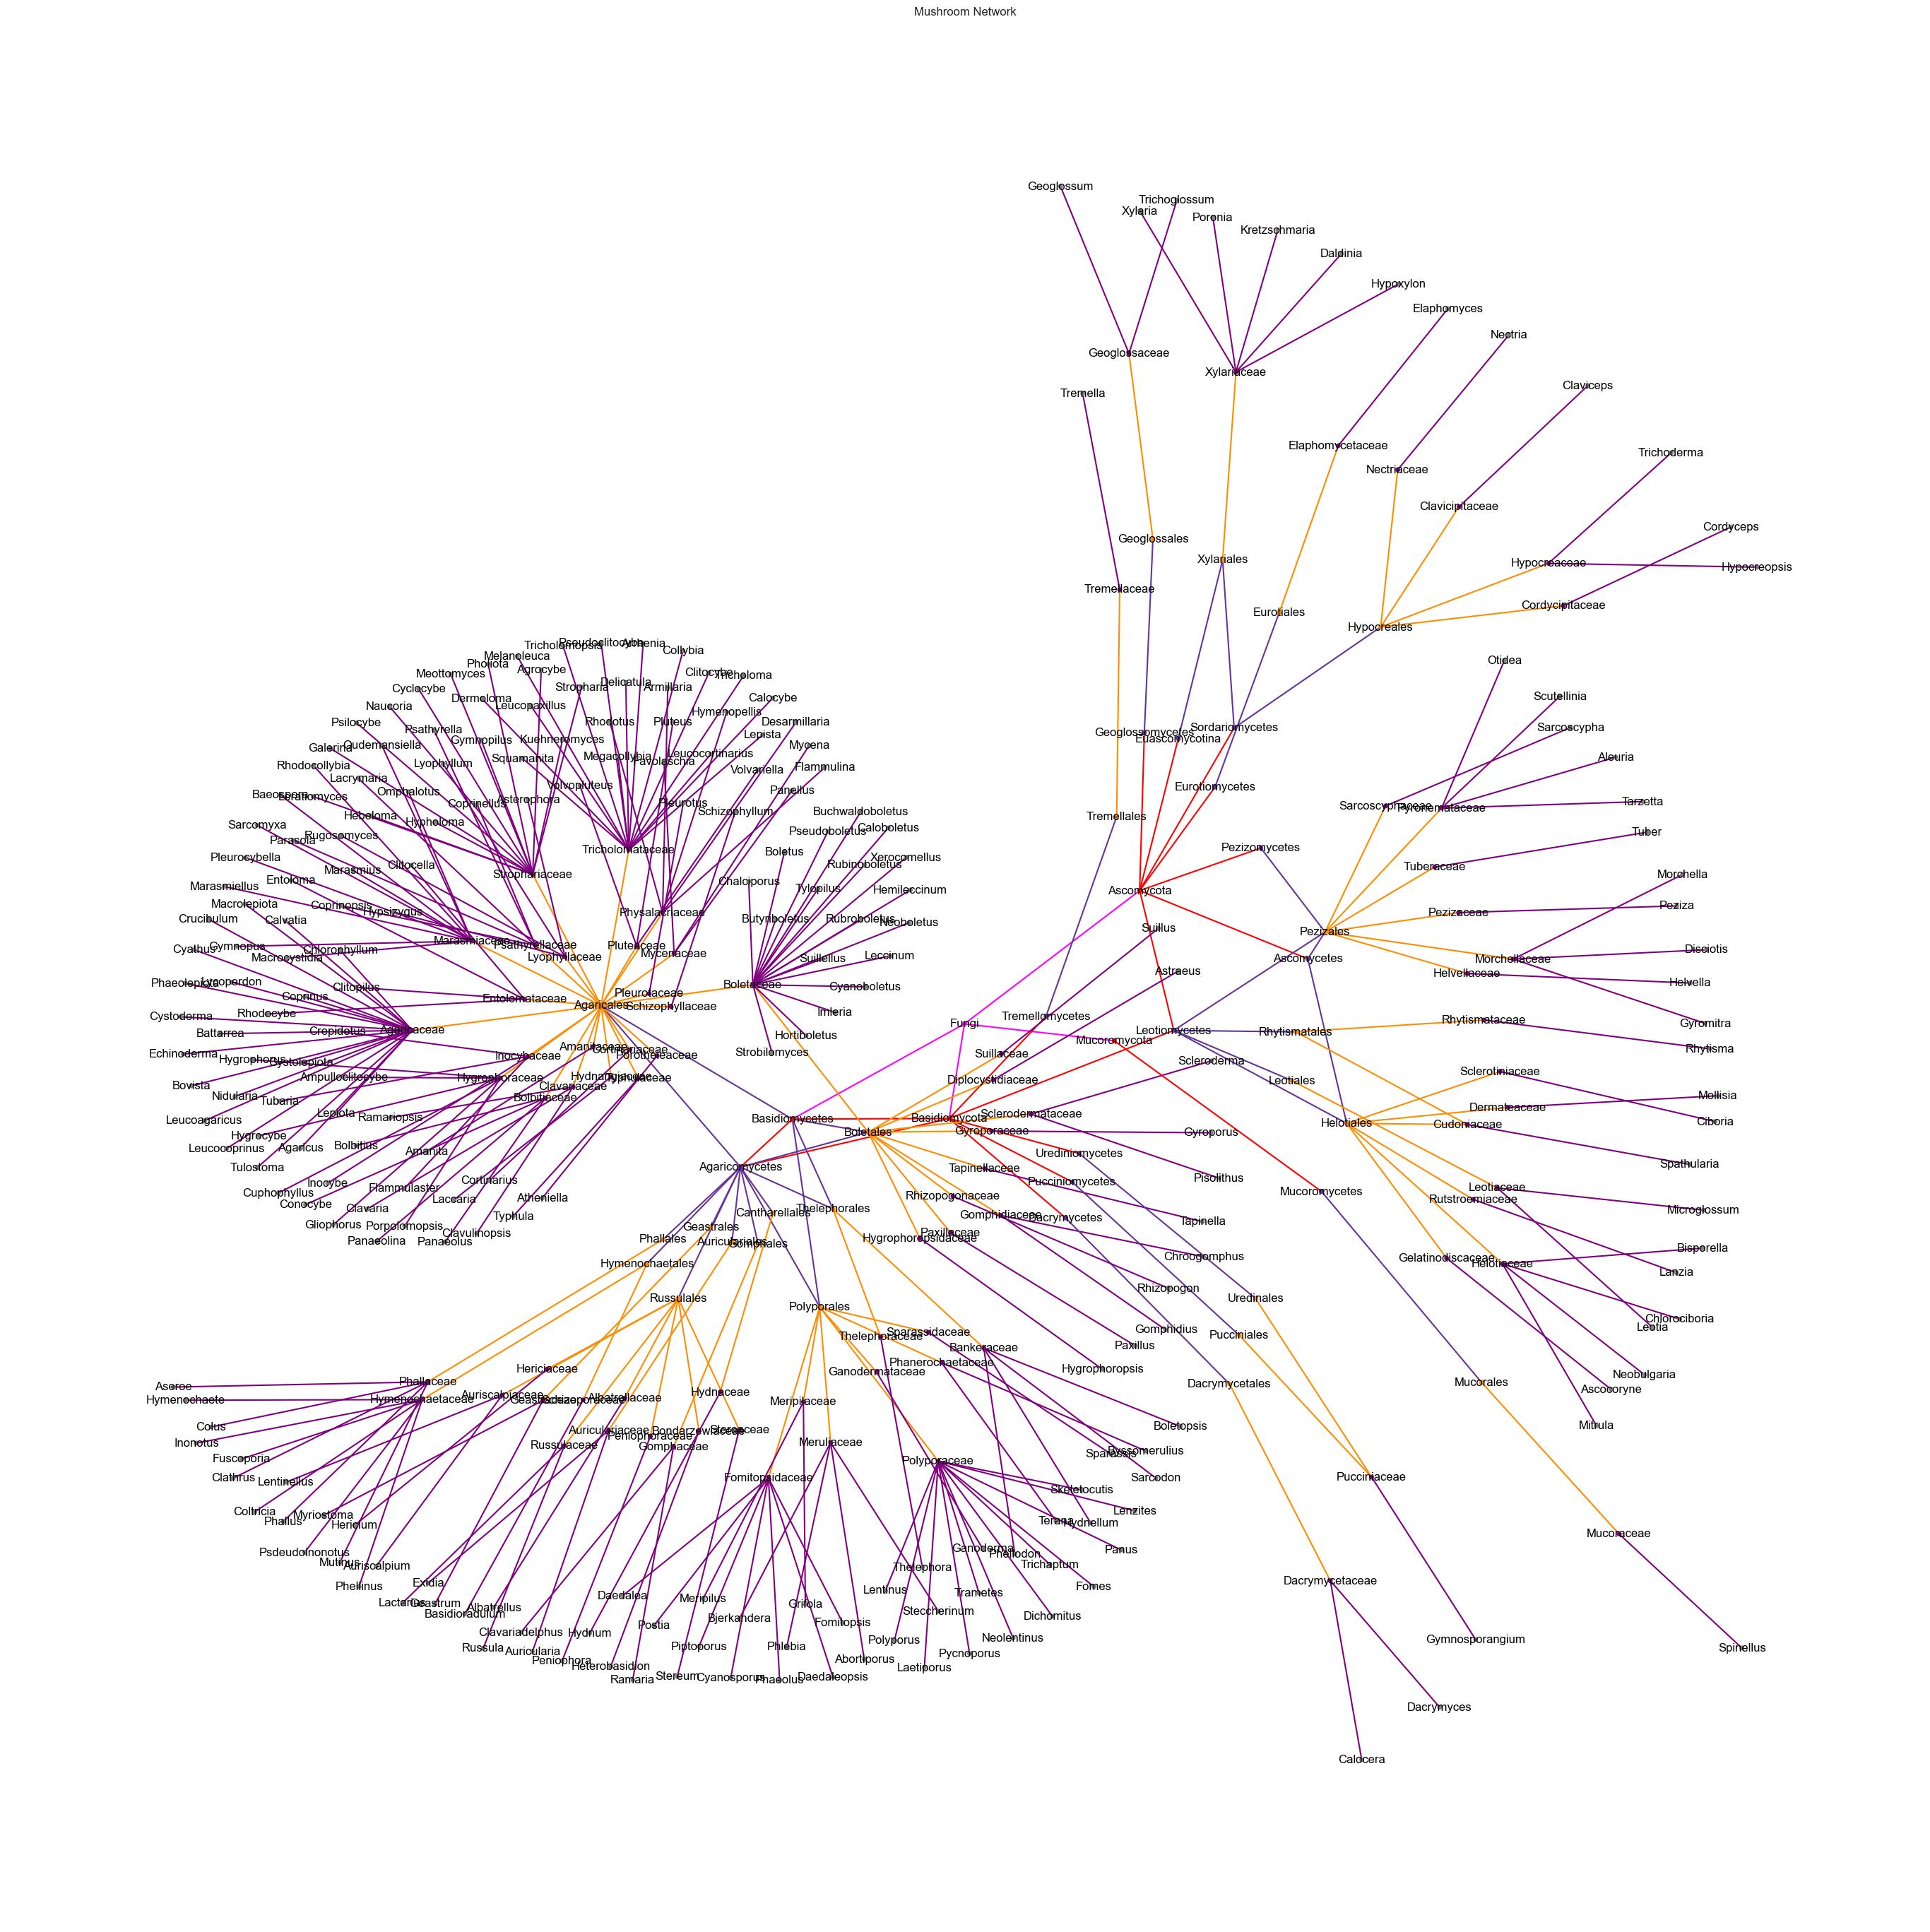

In [7]:
pos = nx.kamada_kawai_layout(G)

node_style = {
    "node_size": 15,
}

level_colors = {
    "Kingdom": "fuchsia",
    "Phylum": "red",
    "Class": "rebeccapurple",
    "Order": "darkorange",
    "Family": "purple",
}

edge_colors = {
    "Kingdom": "fuchsia",
    "Phylum": "red",
    "Class": "rebeccapurple",
    "Order": "darkorange",
    "Family": "purple",

}

plt.figure(figsize=(35, 35))

edge_colors = [edge_colors.get(G.edges[edge].get("level", ""), "gray") for edge in G.edges]
node_colors = [level_colors.get(G.nodes[node].get("level", ""), "gray") for node in G.nodes]

nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors, **node_style)

nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, width=1.5)

node_labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos=pos, labels=node_labels)

plt.axis("off")
plt.title("Mushroom Network")
plt.savefig("img/mushroom_network.png", dpi=300)
plt.show()

Finding related genera

In [18]:
%store -r predicted_class

predicted_family = dataset[dataset['genus'] == predicted_class]['family'].values[0]
related_genera = dataset[dataset['family'] == predicted_family]['genus'].unique()
related_genera = related_genera.tolist()
related_genera.remove(predicted_class)  # Remove the predicted class from the related genera list

if len(related_genera) == 0:
    print("I have no family :(")
else:
    print("Related genera in the family:")
    for genus in related_genera:
        print(genus)

predicted_order = dataset[dataset['genus'] == predicted_class]['order'].values[0]
predicted_classb = dataset[dataset['genus'] == predicted_class]['class'].values[0]
predicted_phylum = dataset[dataset['genus'] == predicted_class]['phylum'].values[0]
predicted_kingdom = dataset[dataset['genus'] == predicted_class]['kingdom'].values[0]

print("Predicted Order:", predicted_order)
print("Predicted Class:", predicted_classb)
print("Predicted Phylum:", predicted_phylum)
print("Predicted Kingdom:", predicted_kingdom)

Related genera in the family:
Macrolepiota
Chlorophyllum
Coprinus
Calvatia
Crucibulum
Cyathus
Cystoderma
Cystolepiota
Nidularia
Echinoderma
Bovista
Phaeolepiota
Lycoperdon
Battarrea
Leucocoprinus
Leucoagaricus
Tulostoma
Lepiota
Predicted Order: Agaricales
Predicted Class: Agaricomycetes
Predicted Phylum: Basidiomycota
Predicted Kingdom: Fungi


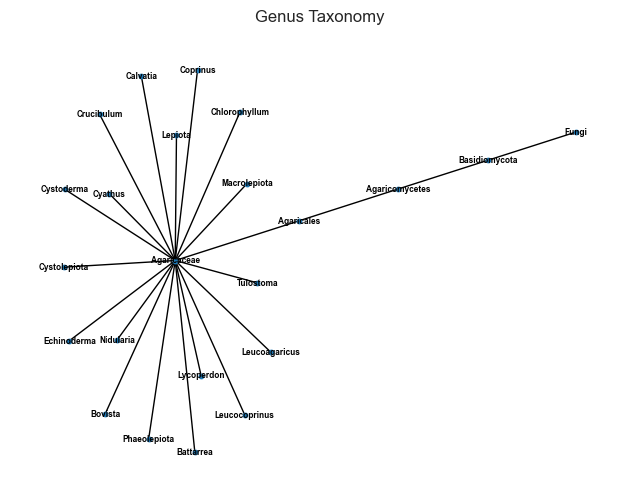

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

node_style = {
    "node_size": 10,
}

G = nx.Graph()
G.add_node(predicted_kingdom, label=predicted_kingdom)
G.add_node(predicted_phylum, label=predicted_phylum)
G.add_node(predicted_classb, label=predicted_classb)
G.add_node(predicted_order, label=predicted_order)
G.add_node(predicted_family, label=predicted_family)

for genus in related_genera:
    G.add_edge(predicted_kingdom, predicted_phylum)
    G.add_edge(predicted_phylum, predicted_classb)
    G.add_edge(predicted_classb, predicted_order)
    G.add_edge(predicted_order, predicted_family)
    G.add_edge(predicted_family, genus)
    G.add_node(genus, label=genus)

plt.figure(figsize=(8, 6))
pos = nx.kamada_kawai_layout(G)
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx(G, pos=pos, with_labels=True, labels=node_labels, font_size=6, font_weight='bold', **node_style)
plt.title('Genus Taxonomy')
plt.axis('off')
plt.show()


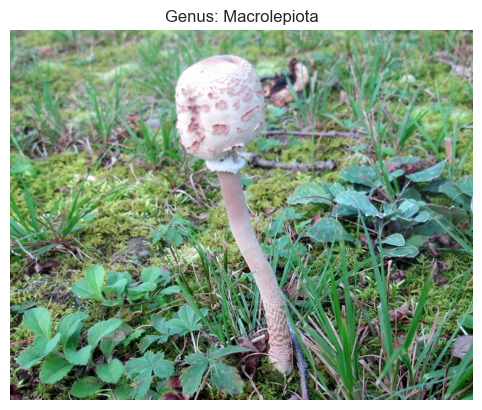

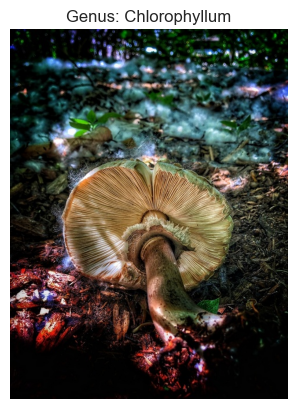

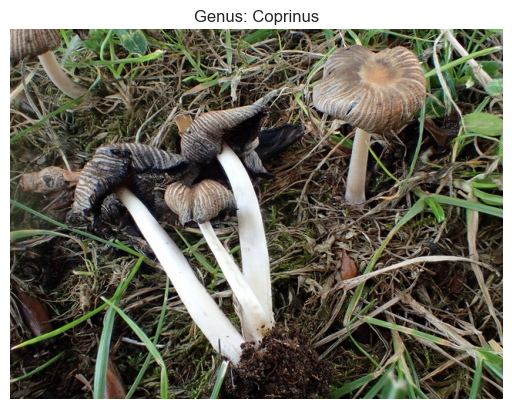

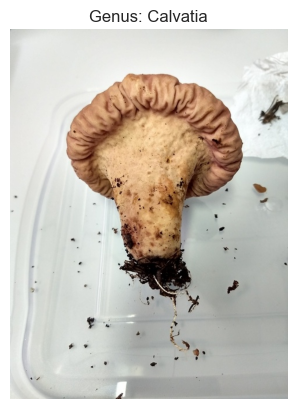

No image found for genus: Crucibulum
No image found for genus: Cyathus
No image found for genus: Cystoderma


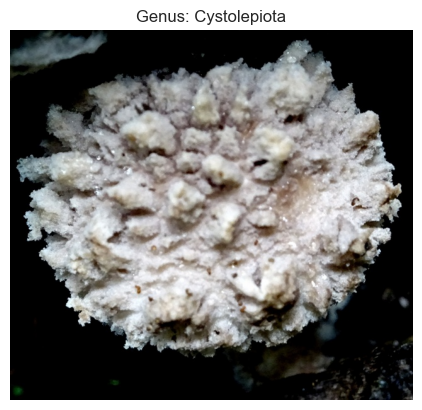

Image folder not found for genus: Nidularia
No image found for genus: Echinoderma


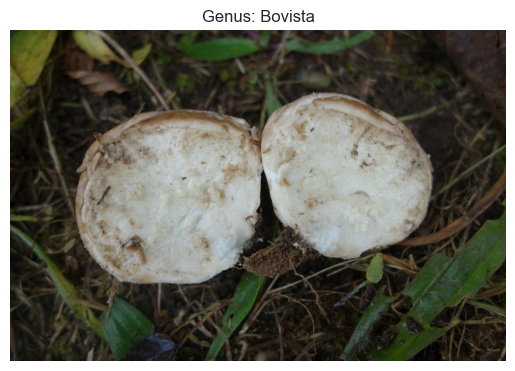

Image folder not found for genus: Phaeolepiota


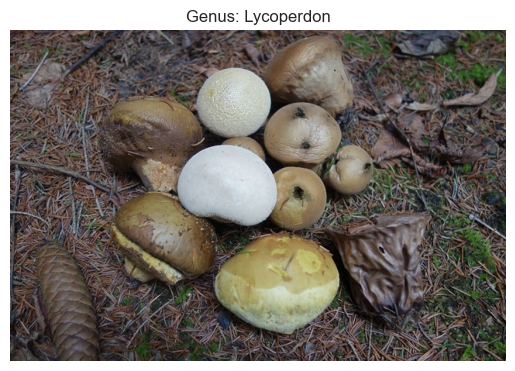

No image found for genus: Battarrea


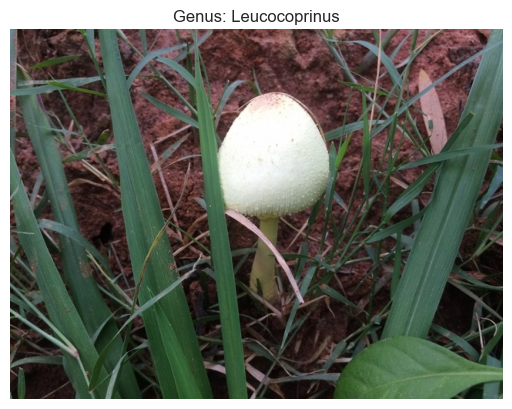

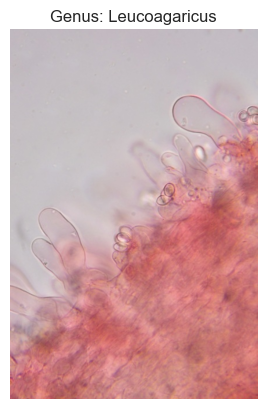

Image folder not found for genus: Tulostoma


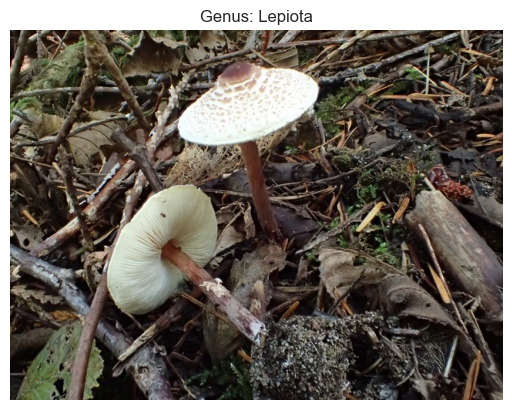

In [20]:
import os
from PIL import Image

# Specify folder path
image_folder = 'data_train'
for genus in related_genera:
    genus_image_folder = os.path.join(image_folder, genus)
    if os.path.exists(genus_image_folder):
        genus_images = os.listdir(genus_image_folder)
        if len(genus_images) > 0:
            genus_image_path = os.path.join(genus_image_folder, genus_images[0])
            genus_image = Image.open(genus_image_path)

            plt.imshow(genus_image)
            plt.axis('off')
            plt.title(f'Genus: {genus}')
            plt.show()
        else:
            print(f"No image found for genus: {genus}")
    else:
        print(f"Image folder not found for genus: {genus}")